This is the Python code is based on the examples in Chapter 3 of the book:

FIBER-REINFORCED COMPOSITES
Materials, Manufacturing, and Design
by: P.K. Mallick (2008) by Taylor & Francis Group, LLC

and is discussed during the lecture on classical laminate theory in the course:

Composite and Lightweight Materials (4MM00)

at Eindhoven University of Technology

This code:
(C) Joris Remmers (2013-2023)

## Example 5 (Classical Laminate Theory)

Consider a fibre reinforced plastic that consists of uni-directional carbon fibres embedded in an epoxy matrix. 
The fibre volume fraction $V_f=0.6$. The properties of the transverse isoptric fibre are: $E_{\rm fL} = 220\,$GPa ; 
$E_{\rm fT} = 20\,$GPa ; $\nu_{\rm f} = 0.2$ ; $G_{\rm f} = 91.7\,$GPa.

The properties of the isotropic epoxy matrix are $E_{\rm m} = 3.6\,$GPa ; $\nu_{\rm f} = 0.35$ ; 
$G_{\rm f} = 1.33\,$GPa.

The resulting UD composite material is used in an angle ply laminate consisting of 4 layers with a
thickness $6\,$mm and stacking sequence $\lbrack \theta,-\theta\rbrack_{\rm S}$. Determine the apparent stiffness parameter $E_x, E_y, \nu_{xy}$ and $G_{xy}$ for all angles $0<\theta<90$. Plot the results in a graph.

## Solution

In [1]:
from composite import TransverseIsotropic,mixMaterials

For this carbon fiber composite material, the carbon fibers and the epoxy matrix are modeled as separate transversely isotropic materials. The T-300 carbon fibers have Young's Moduli $E_1=220\,$GPa,  $E_2=22\,$GPa, a Poisson's ratio $\nu_{12}=0.2$ and a Shear Modulus $G_{12}=91.7\,$GPa. The epoxy matrix may be considered isotropic with Young's modulus $E=3.6\,$GPa, Poisson's ratio $\nu=0.35$ and Shear Modulus $G_{12}=1.33\,$GPa. 

In [2]:
carbon = TransverseIsotropic( [220e9,22e9],0.2,91.7e9)
epoxy  = TransverseIsotropic( 3.6e9,0.35,1.33e9)

The properties of carbon and epoxy are:

In [3]:
print(carbon)
print(epoxy)


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     2.200e+11 , E2     :     2.200e+10 
  nu12   :          0.20 , G12    :     9.170e+10 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     3.600e+09 , E2     :     3.600e+09 
  nu12   :          0.35 , G12    :     1.330e+09 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 



The composite consists of 60\% fibres and 40\% epoxy. The properties of the composite can be calculated by simple homogensiation.

In [4]:
udcomp = mixMaterials( carbon , epoxy , 0.6 )
    

Calculate the $\bf{A},\bf{B}$ and ${\bf D}$ matrices for a given a laminate of UD material with a stacking sequence $\lbrack 0,45,-45,90\rbrack_{\rm S}$. Each layer has a thickness of $0.3$\,mm.

In [5]:
from composite import Laminate
lam = Laminate()

lam.addMaterial( 'UD' , udcomp )

Calculate the layer properties of a cross ply layer in a loop in which $\theta$ is varied from 0 to 90 degrees. The results are stored in an empty list 'total'.

In [6]:
total = []

for theta in range(91):
  lam.removeAllLayers()

  lam.addLayer( 'UD' ,  theta , 6e-3 )
  lam.addLayer( 'UD' , -theta , 6e-3 )
  lam.addLayer( 'UD' , -theta , 6e-3 )
  lam.addLayer( 'UD' ,  theta , 6e-3 )

  output = lam.getElastic()   #list of 4 values: Ex, Ey, Gxy and nuxy

  output.append(theta)        #the angle is added as 5th value

  total.append(output)

The results are plotted using matplotlib.

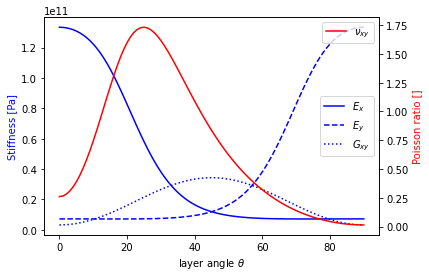

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_xlabel('layer angle $\\theta$')
ax1.set_ylabel('Stiffness [Pa]', color='b')
ax2.set_ylabel('Poisson ratio []', color='r')

ax1.plot( [x[4] for x in total], [x[0] for x in total], 'b-'  , label="$E_x$" )
ax1.plot( [x[4] for x in total], [x[1] for x in total], 'b--' , label="$E_y$" )
ax1.plot( [x[4] for x in total], [x[3] for x in total], 'b:'  , label="$G_{xy}$" )
ax2.plot( [x[4] for x in total], [x[2] for x in total], 'r-'  , label="$\\nu_{xy}$" )

ax1.legend(loc="center right")
ax2.legend(loc="upper right")

plt.show()